<a href="https://colab.research.google.com/github/Hamid-Mofidi/Diffusion-Models/blob/main/GMM_noising/MNIST-fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml

In [ ]:
# Parameters for generating Gaussian distributions
n_clusters = 5

In [ ]:
#In the MNIST dataset, each image is a 28x28 pixel grayscale image and there are 70,000 such images.
# Thus, shape of X is (70000, 784), where 784 is the flattened size of each image (28 * 28)
def MNIST_dataset(random_seed=42):
    # Set NumPy random seed
    np.random.seed(random_seed)

    # Load MNIST dataset
    #mnist = fetch_openml('mnist_784', version=1)
    fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
    a, b = fashion_mnist.data.values, fashion_mnist.target.astype(int)
    #a, b = mnist.data, mnist.target.astype(int)

    # Select a subset of the data (e.g., first 10,000 samples)
    subset_size = n_clusters
    a_subset, b_subset = a[:subset_size], b[:subset_size]

    return a_subset, b_subset

In [ ]:
# Load MNIST data
a_subset, b_subset = MNIST_dataset(random_seed=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(a_subset.shape)
print(b_subset.shape)
print(a_subset[0].shape)

(5, 784)
(5,)
(784,)


In [ ]:
# Create an array X of size n_clusters x 784 x 1
X = np.zeros((n_clusters, 784, 1))

# Reshape and store elements from a_subset in X
for i in range(n_clusters):
    X[i] = a_subset[i].reshape(-1, 1)/ 255.0  # Normalize by dividing by 255.0

print(X.shape)
print(X[1].shape)
print('first image is =', b_subset[0])
print('Second image is =',b_subset[1])

(5, 784, 1)
(784, 1)
first image is = 9
Second image is = 0


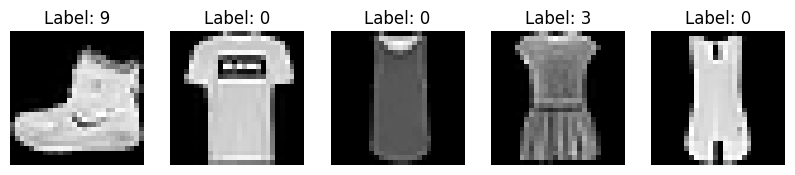

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, n_clusters, figsize=(10, 3))


# Reshape and plot each image horizontally
for i in range(n_clusters):
    image_to_plot = X[i].reshape(28, 28)
    axs[i].imshow(image_to_plot, cmap='gray')
    axs[i].set_title(f"Label: {b_subset[i]}")
    axs[i].axis('off')

plt.show()

In [ ]:
def plot_noisy_images(X, n_clusters):
    fig, axes = plt.subplots(n_clusters, 2, figsize=(8, 2 * n_clusters))

    for i in range(n_clusters):
      # Plot original image
      axes[i, 0].imshow(X[i].reshape(28, 28), cmap='gray')


      # Plot noised image
      axes[i, 1].imshow(X_noised[i].reshape(28, 28), cmap='gray')


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_MNIST_histograms(X, n_clusters):
    fig, ax = plt.subplots(figsize=(6, 4))

    for i in range(n_clusters):
        ax.hist(X[i].flatten(), bins=50, alpha=0.5, label=f'Cluster {i}')

    ax.set_title('Histograms of Different Clusters')
    ax.set_xlabel('Feature Value (Normalized)')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

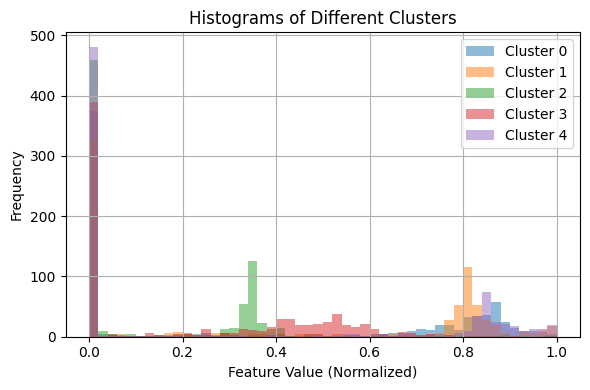

In [ ]:
# Plot histograms for each cluster in X
plot_MNIST_histograms(X, n_clusters)

In [ ]:
def add_noise(X, diffusion_steps, eps):
    X_noised = X.copy()
    noise = np.random.normal(size=X.shape)

    for j in range(diffusion_steps):
        X_noised += eps * noise

    return X_noised

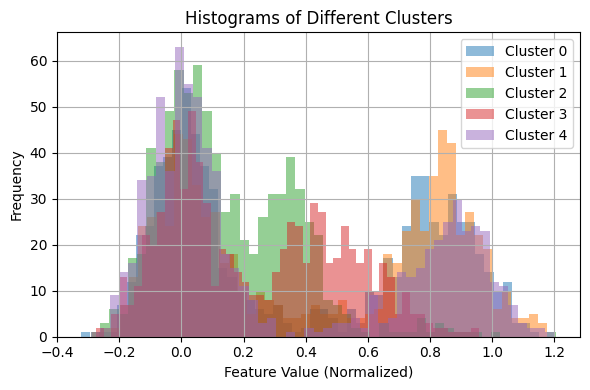

In [ ]:
# Add noise to the data
diffusion_steps = 10
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_MNIST_histograms(X_noised, n_clusters)

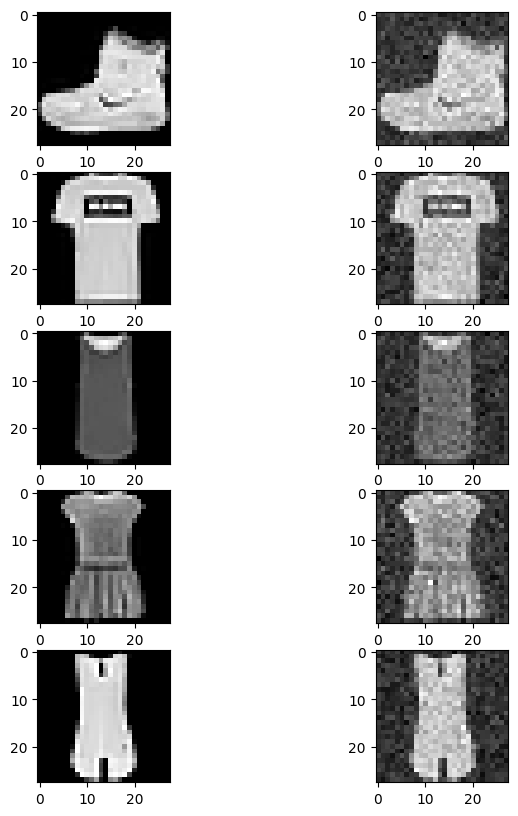

In [ ]:
plot_noisy_images(X, n_clusters)

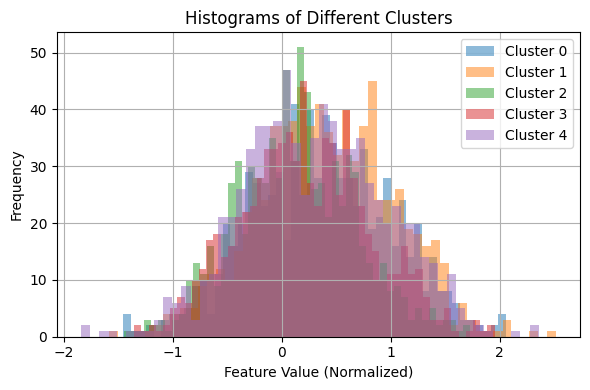

In [ ]:
# Add noise to the data
diffusion_steps = 50
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_MNIST_histograms(X_noised, n_clusters)

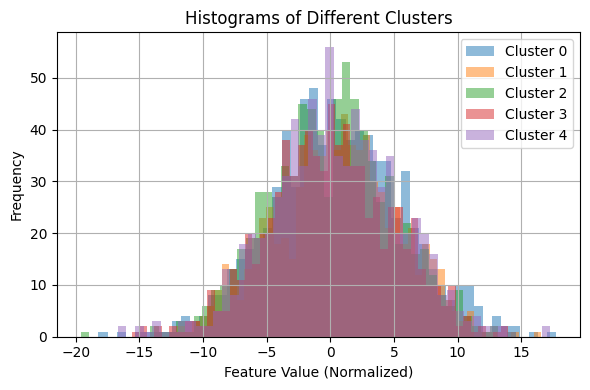

In [ ]:
# Add noise to the data
diffusion_steps = 500
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_MNIST_histograms(X_noised, n_clusters)

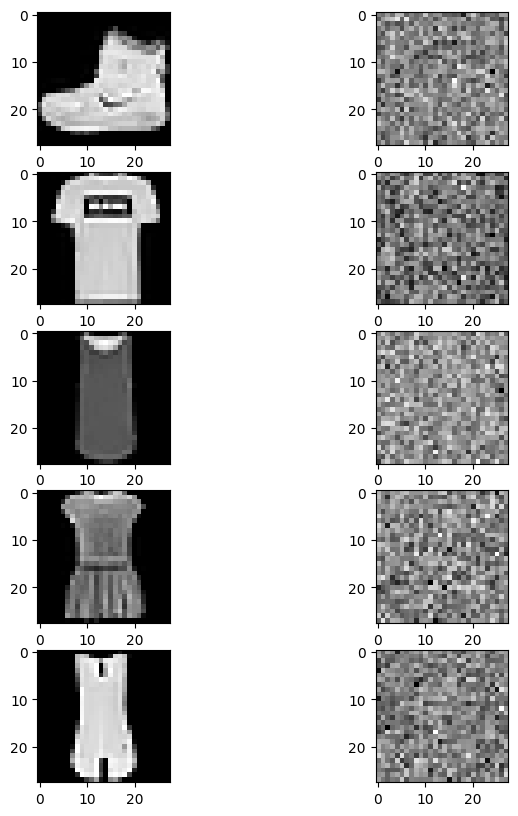

In [ ]:
plot_noisy_images(X, n_clusters)

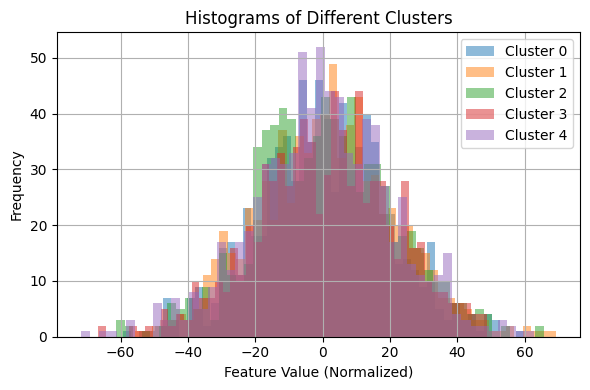

In [ ]:
# Add noise to the data
diffusion_steps = 2000
eps = 1e-2
X_noised = add_noise(X, diffusion_steps, eps)

# Plot histograms for each cluster in X_noised
plot_MNIST_histograms(X_noised, n_clusters)